### Abstract

# I. Introduction

### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Data collection

In [2]:
sales_data = pd.read_csv(r'../Raw_Data/SalesForCourse_quizz_table.csv')

### Data defintion

In [3]:
print(sales_data.shape) 

(34867, 16)


In [4]:
print(sales_data.head()) 

   index      Date    Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016.0  February          29.0               F   
1      1  02/20/16  2016.0  February          29.0               F   
2      2  02/27/16  2016.0  February          29.0               F   
3      3  03/12/16  2016.0     March          29.0               F   
4      4  03/12/16  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50   28.

In [5]:
print(sales_data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [6]:
print(sales_data.columns)

Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')


In [7]:
print(sales_data['Sub Category'].unique()) # 17 unique values

['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests' 'Road Bikes' 'Bike Racks'
 'Shorts' nan]


In [8]:
print(sales_data.nunique())

index               34867
Date                  576
Year                    2
Month                  12
Customer Age           70
Customer Gender         2
Country                 4
State                  45
Product Category        3
Sub Category           17
Quantity                3
Unit Cost             882
Unit Price           5175
Cost                  417
Revenue              3023
Column1              1281
dtype: int64


In [9]:
print(sales_data.describe())

              index          Year  Customer Age      Quantity     Unit Cost  \
count  34867.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17433.000000   2015.569237     36.382895      2.002524    349.880567   
std    10065.380254      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.500000   2015.000000     28.000000      1.000000     45.000000   
50%    17433.000000   2016.000000     35.000000      2.000000    150.000000   
75%    26149.500000   2016.000000     44.000000      3.000000    455.000000   
max    34866.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue      Column1  
count  34866.000000  34866.000000  34867.000000  2574.000000  
mean     389.232485    576.004532    640.870093   688.054913  
std      525.319091    690.500395    736.640033   774.200897  
min        0.666667      2.000000   

# II. Data cleaning

In [10]:
print(sales_data.isnull().sum())

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [11]:
sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [12]:
sales_data.drop(34866, inplace=True)

In [13]:
sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,03/22/15,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,NaN
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,NaN


In [14]:
#drop "Column1" column
sales_data.drop('Column1', axis=1, inplace=True)

In [15]:
sales_data[sales_data.isnull().any(axis=1)]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue


In [16]:
print(sales_data.isnull().sum())

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


In [17]:
print(sales_data.describe())

              index          Year  Customer Age      Quantity     Unit Cost  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean   17432.500000   2015.569237     36.382895      2.002524    349.880567   
std    10065.091579      0.495190     11.112902      0.813936    490.015846   
min        0.000000   2015.000000     17.000000      1.000000      0.670000   
25%     8716.250000   2015.000000     28.000000      1.000000     45.000000   
50%    17432.500000   2016.000000     35.000000      2.000000    150.000000   
75%    26148.750000   2016.000000     44.000000      3.000000    455.000000   
max    34865.000000   2016.000000     87.000000      3.000000   3240.000000   

         Unit Price          Cost       Revenue  
count  34866.000000  34866.000000  34866.000000  
mean     389.232485    576.004532    640.870074  
std      525.319091    690.500395    736.650597  
min        0.666667      2.000000      2.000000  
25%       53.666667     85.000000    1

In [18]:
print(sales_data.duplicated().sum())

0


In [19]:
sales_data['Date'] = pd.to_datetime(sales_data['Date']) 

In [20]:
sales_data['Year'] = sales_data['Year'].astype(int)

# III. Analyzing the data

### Overall trend in revenue

The bike company has been in the market for several years, offering a wide range of bicycles for different customers and purposes. The company has seen a steady increase in sales over the years. In this analysis, we will be taking a closer look at the sales data of the bike company to understand the overall trend in revenue and identify any patterns or insights that can inform future business decisions.

In [21]:
sales_data.sort_values(by=['Date', 'Month'], inplace=True)

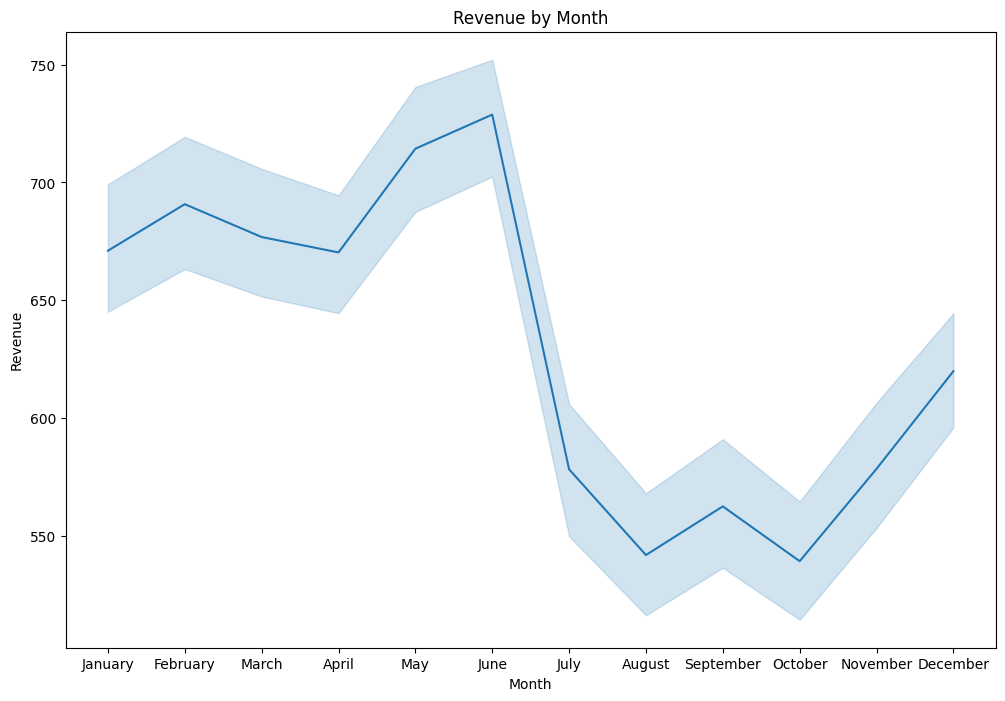

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='Revenue', data=sales_data)
plt.title('Revenue by Month')
plt.show()

The bike company's sales data reveals a clear seasonal pattern, with revenue showing an increase during the late spring and early summer months. This is likely due to the favorable weather conditions that make cycling a more attractive activity during this period. However, this trend takes a sharp turn in July, with revenue dropping rapidly. The reason for this drop in sales is unclear but could be attributed to a combination of factors such as increased competition, changes in consumer behavior, or shifts in the overall economy. Following the drop in July, sales remain low throughout the fall before picking back up again in winter. This pattern of low fall sales and high winter sales may be due to the weather, with cold and wet conditions making cycling less appealing during the fall and winter months. 

In [23]:
sales_data = sales_data.assign(Season = sales_data['Month'].map({'January': '1 Winter', 'February': '1 Winter', 'March': '2 Spring', 'April': '2 Spring', 'May': '2 Spring', 'June': '3 Summer', 'July': '3 Summer', 'August': '3 Summer', 'September': '4 Fall', 'October': '4 Fall', 'November': '4 Fall', 'December': '1 Winter'}))

In [24]:
sales_data['Season'].value_counts()

2 Spring    10114
1 Winter     9208
3 Summer     8199
4 Fall       7345
Name: Season, dtype: int64

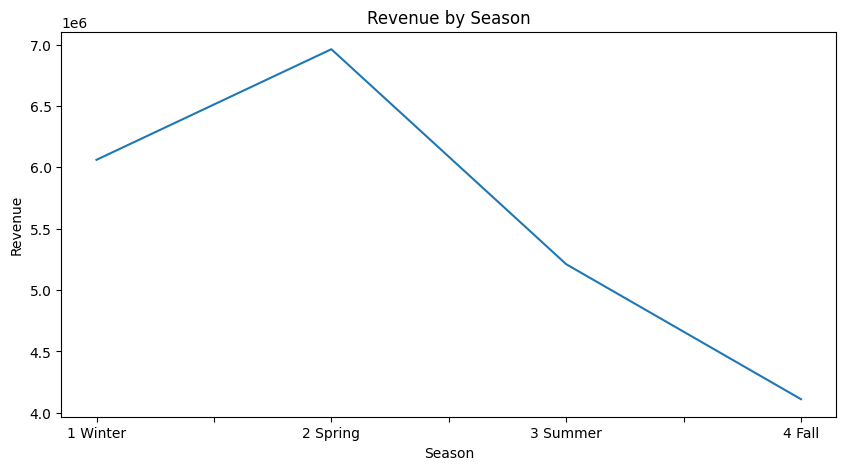

In [25]:
sales_data.groupby('Season')['Revenue'].sum().plot(kind='line', figsize=(10, 5))
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.show()

The above chart highlights the seasonal patterns in the company's revenue. It depicts the revenue of a bike company over the course of a year. It starts with a relatively low value during the winter months, representing low sales currently. The line gradually increases as we approach the spring, reaching a peak as revenue reaches its highest point for the year. The peak occurs during the spring, driven by the combination of good weather and increased demand from consumers. After the spring peak, the line starts to drop, showing a decline in revenue during the summer and fall months. This decrease in revenue is likely due to a combination of factors such as increased competition, changes in consumer behavior, and unfavorable weather conditions during these months. 

In [26]:
sales_data['Day'] = sales_data['Date'].dt.day_name()

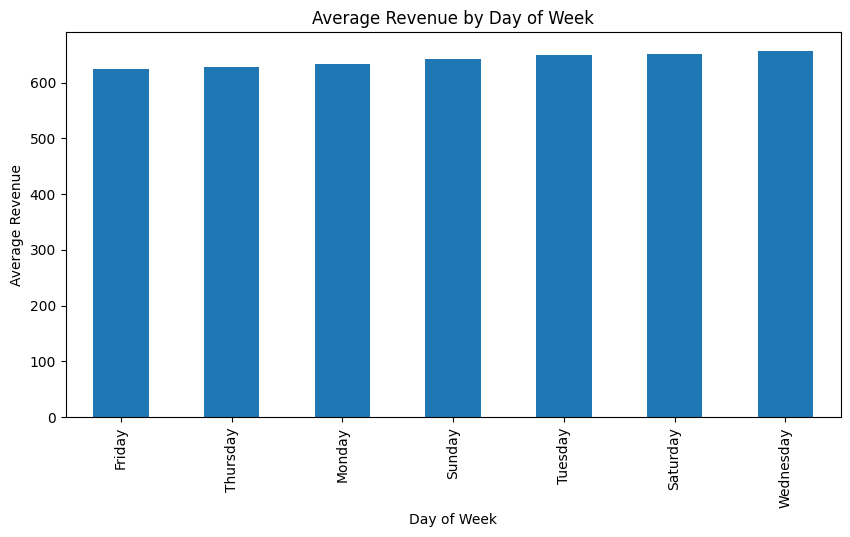

In [27]:
sales_data.groupby('Day')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Revenue')
plt.show()

The chart above is displaying the average revenue of a bike company by day of the week. It shows a stable pattern throughout the week, with relatively small fluctuations between the days. Despite this stability, there seems to be a clear standout day, with Wednesday being the most popular day for shopping at the bike company. This could be attributed to various factors, such as consumer behavior or special promotions offered on this day. On the other hand, Friday appears to be the least popular day for shopping, with the lowest average revenue. 

### Patterns in revenue by product category and sub category

Next, we analyzed the bike company's sales data, looking for patterns in revenue by product category and sub-category. The purpose of breaking down the sales data in this way was for us to gain a deeper understanding of which product types are performing well and which are underperforming. We could use this information to inform the company to help optimize revenue and drive growth. 

In [28]:
sales_data.groupby('Sub Category')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub Category,,,,,,,,
Bike Racks,103.0,1367.514563,1275.993207,134.0,440.00,906.0,1936.50,5082.0
Bike Stands,145.0,1040.765517,532.682077,168.0,576.00,1041.0,1401.00,2153.0
Bottles and Cages,5295.0,133.976771,92.144324,4.0,61.00,119.0,183.00,465.0
Caps,1517.0,168.748846,96.037527,8.0,88.00,169.0,245.00,478.0
Cleaners,545.0,152.086239,83.132568,8.0,85.00,155.0,214.00,367.0
Fenders,762.0,432.026247,250.349499,19.0,210.25,429.0,646.00,1078.0
Gloves,480.0,475.735417,281.083177,24.0,235.75,467.5,715.25,1256.0
Helmets,4176.0,655.701628,386.717810,28.0,326.75,639.0,962.25,1826.0
Hydration Packs,396.0,1018.373737,589.586555,48.0,528.75,1011.0,1481.75,2555.0


The sub category summary statistics allowed us to gain insights into the most and least popular products, based on the quantity sold. The results revealed that 'tires and tubes', 'bottles and cages', and 'helmets' were the top three most popular items by quantity. On the other hand, 'bike racks', 'bike stands', and 'vests' were the least popular items. To visualize this information, we created a bar graph that clearly displays the quantity sold by each sub-category.

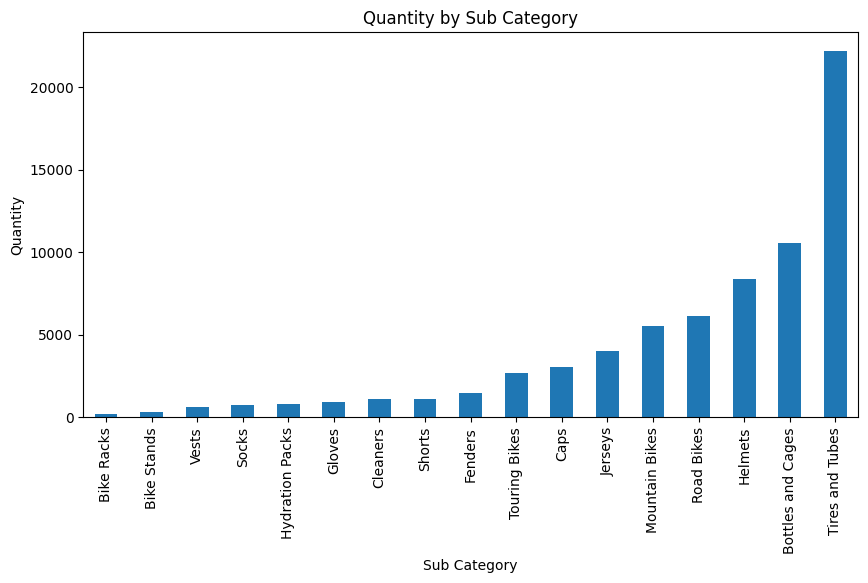

In [29]:
sales_data.groupby('Sub Category')['Quantity'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Quantity by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Quantity')
plt.show()

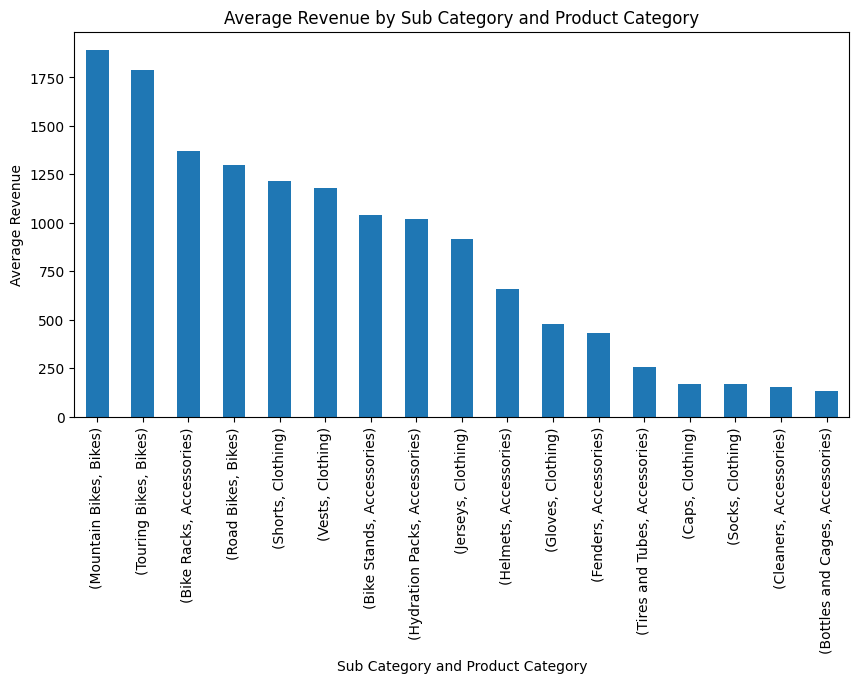

In [30]:
sales_data.groupby(['Sub Category', 'Product Category'])['Revenue'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Revenue')
plt.show()

However, when we looked at the sub categories by revenue, the results were somewhat different from what we saw in terms of quantity sold. Despite having low sales, 'bike racks' surprisingly made it into the top three for highest revenue, along with 'mountain bikes' and 'touring bikes.' On the other hand, 'bottles and cages,' 'cleaners,' and 'socks' generated the least revenue for the company. This information highlights the importance of considering both quantity sold and revenue when making decisions about product offerings, as products with lower sales can still generate significant revenue for the company. 

C:\Users\annco\AppData\Local\Temp\ipykernel_16736\2111250516.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Revenue', 'Cost'].mean().plot(kind='bar', figsize=(10, 5))


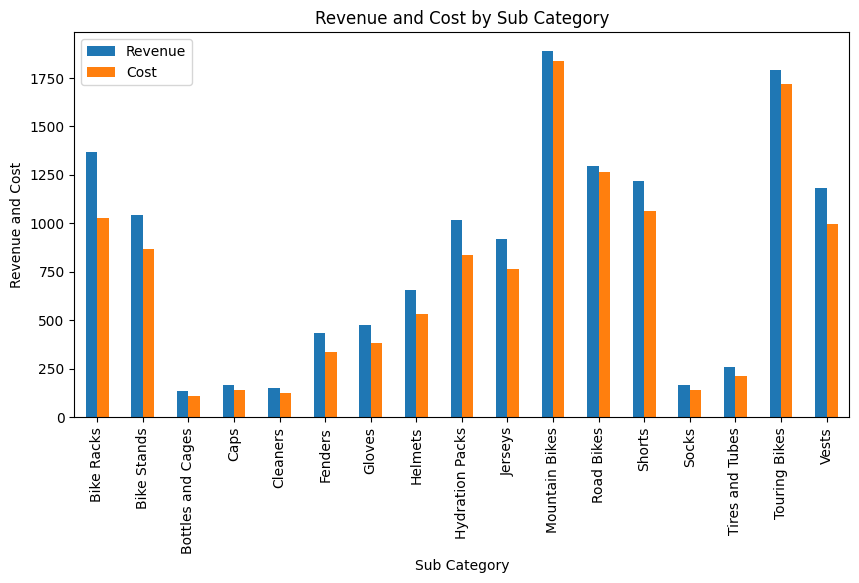

In [31]:
sales_data.groupby('Sub Category')['Revenue', 'Cost'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue and Cost by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Revenue and Cost')
plt.show()

We then took the next step and compared the revenue to costs for each item, as seen in the chart above. Some items, such as 'mountain bikes,' have very high costs that are almost as much as their revenue, which led us to investigate the profit margin for each item. To do this, we created a new column in the sales data called 'Profit Margin,' which subtracted the cost from revenue and divided the result by the revenue. This allowed us to see the profit margin for each product type, providing valuable insights into which products are generating the most profit for the company.

In [32]:
sales_data['Profit Margin'] = (sales_data['Revenue'] - sales_data['Cost']) / sales_data['Revenue']

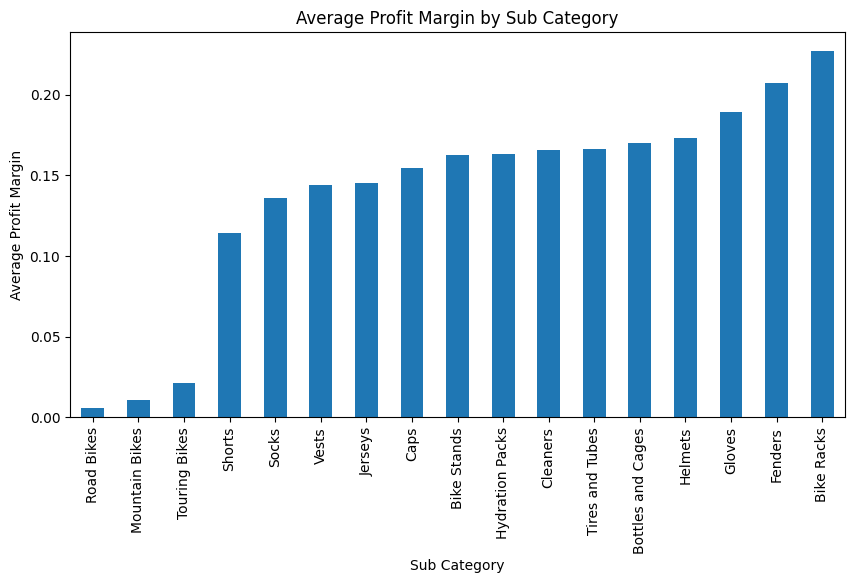

In [33]:
sales_data.groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Profit Margin')
plt.show()

### Patterns in revenue by geographic location

In [34]:
sales_data['Country'].value_counts(normalize=True)

United States     0.518442
United Kingdom    0.184162
Germany           0.149171
France            0.148225
Name: Country, dtype: float64

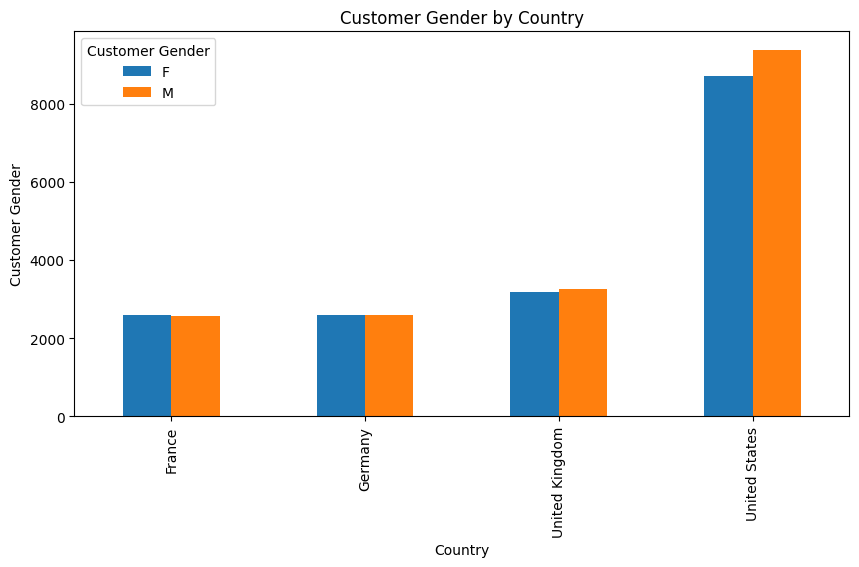

In [35]:
sales_data.groupby('Country')['Customer Gender'].value_counts().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Customer Gender by Country')
plt.xlabel('Country')
plt.ylabel('Customer Gender')
plt.show()


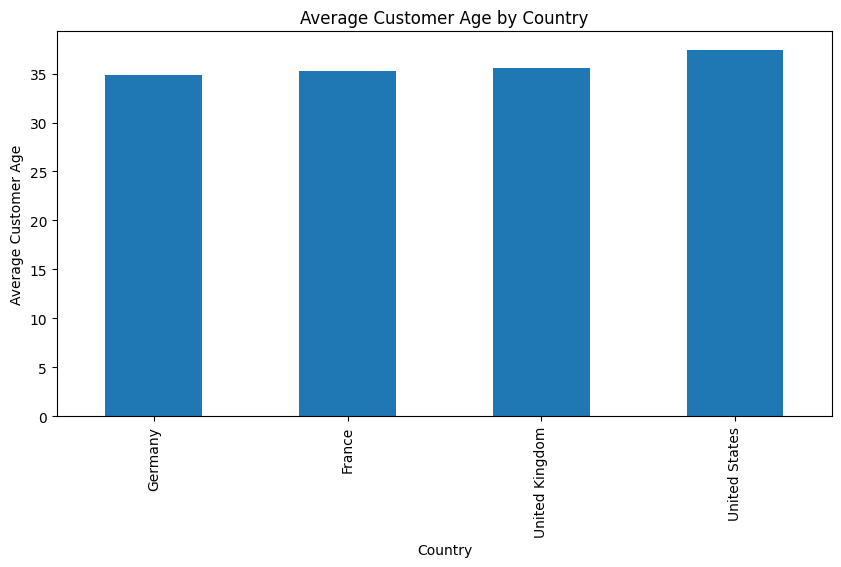

In [36]:
sales_data.groupby('Country')['Customer Age'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Customer Age by Country')
plt.xlabel('Country')
plt.ylabel('Average Customer Age')
plt.show()

In [37]:
sales_data.pivot_table(index='Country', values='Revenue', aggfunc='sum')

,Revenue
Country,
France,3446104.0
Germany,4244510.0
United Kingdom,4276220.0
United States,10377742.0


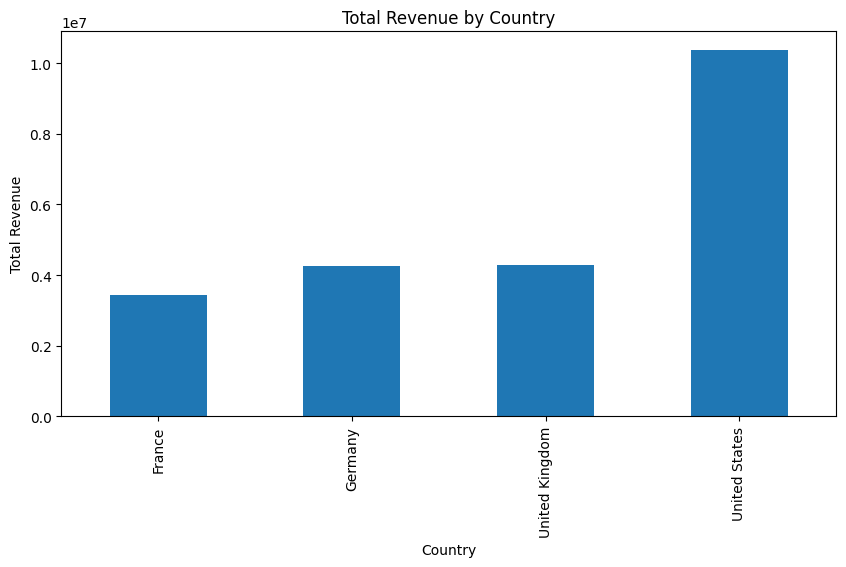

In [38]:
sales_data.groupby('Country')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()

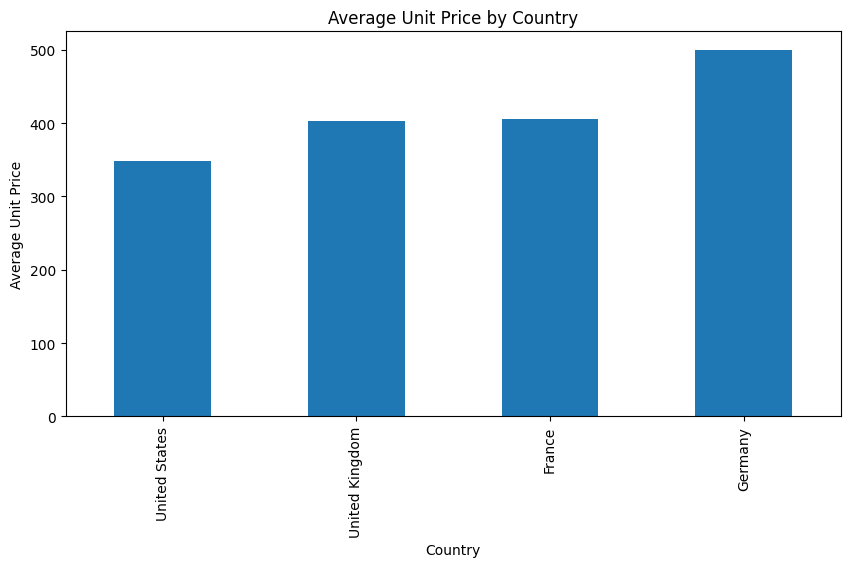

In [39]:
sales_data.groupby('Country')['Unit Price'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.show()

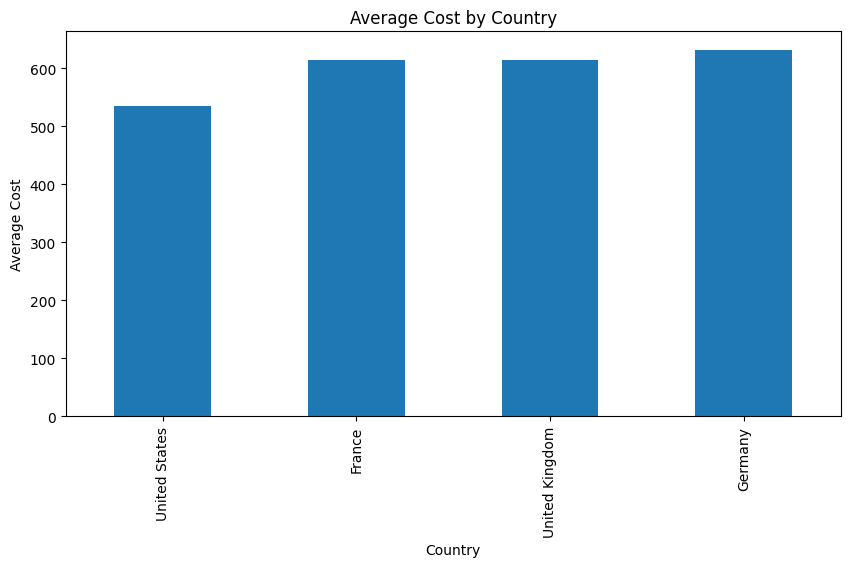

In [40]:
sales_data.groupby('Country')['Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by Country')
plt.xlabel('Country')
plt.ylabel('Average Cost')
plt.show()

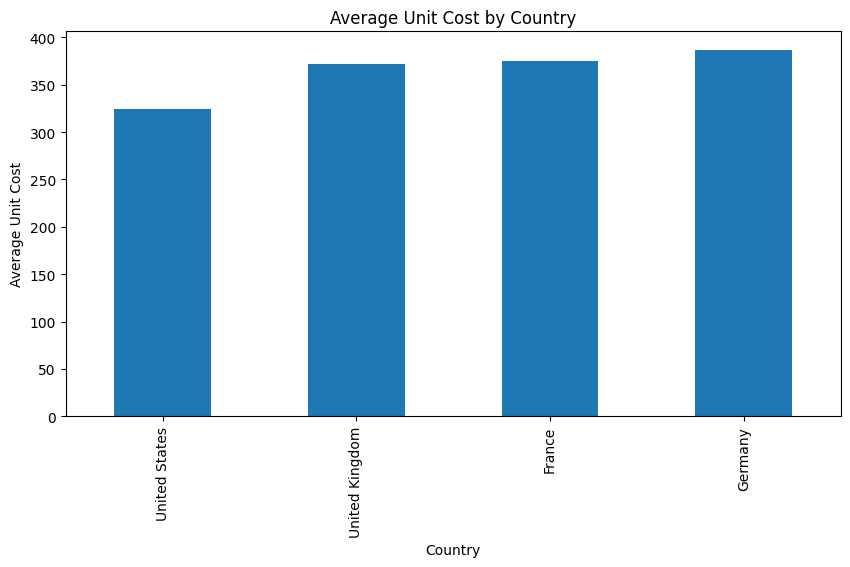

In [41]:
sales_data.groupby('Country')['Unit Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Cost by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Cost')
plt.show()

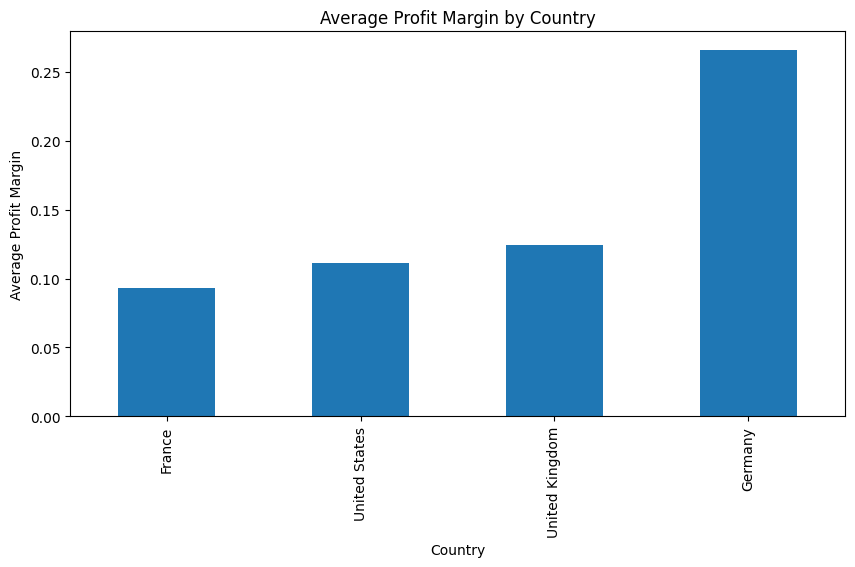

In [42]:
sales_data.groupby('Country')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Country')
plt.xlabel('Country')
plt.ylabel('Average Profit Margin')
plt.show()

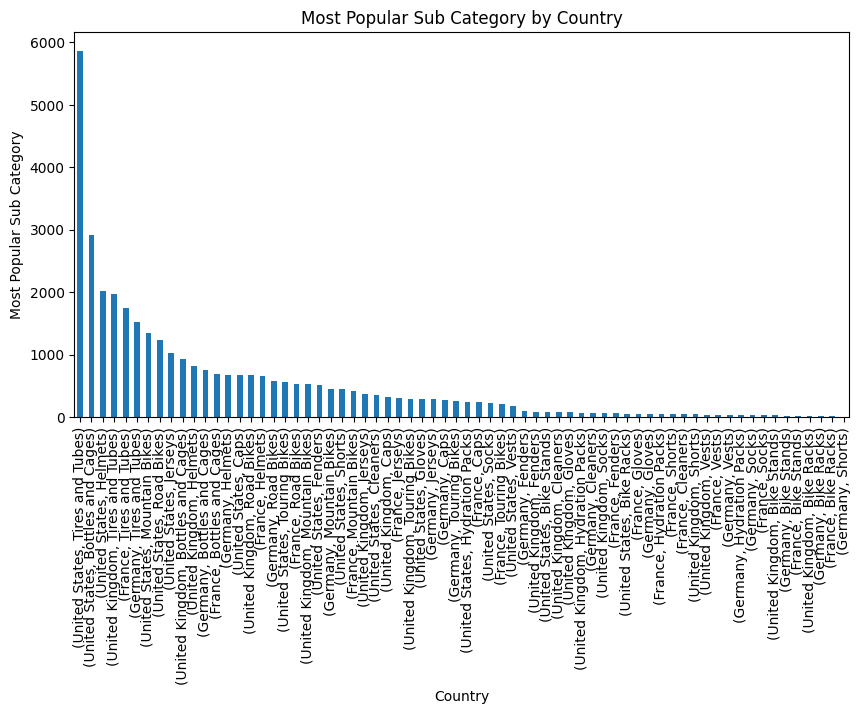

In [43]:
sales_data.groupby('Country')['Sub Category'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Most Popular Sub Category by Country')
plt.xlabel('Country')
plt.ylabel('Most Popular Sub Category')
plt.show()

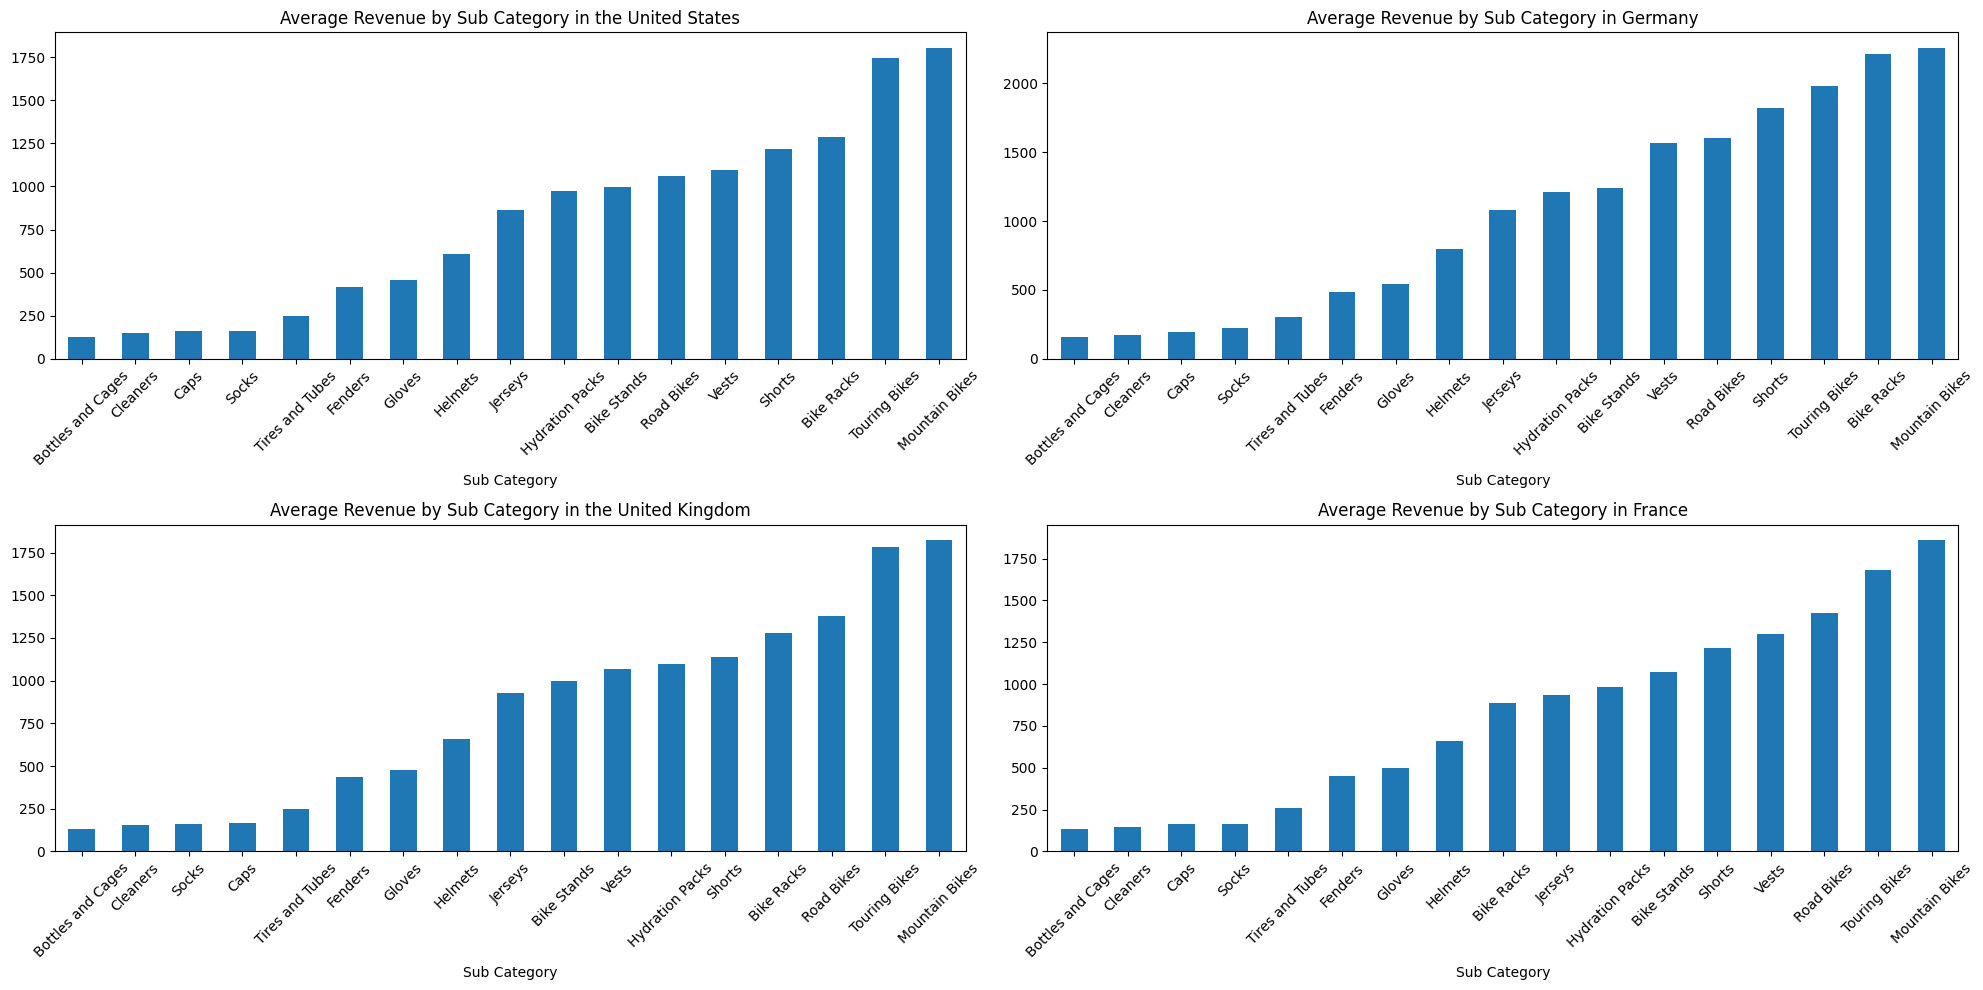

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sales_data[sales_data['Country'] == 'United States'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', ax=ax[0, 0])
sales_data[sales_data['Country'] == 'Germany'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', ax=ax[0, 1])
sales_data[sales_data['Country'] == 'United Kingdom'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', ax=ax[1, 0])
sales_data[sales_data['Country'] == 'France'].groupby('Sub Category')['Revenue'].mean().sort_values().plot(kind='bar', ax=ax[1, 1])
ax[0, 0].set_title('Average Revenue by Sub Category in the United States')
ax[0, 1].set_title('Average Revenue by Sub Category in Germany')
ax[1, 0].set_title('Average Revenue by Sub Category in the United Kingdom')
ax[1, 1].set_title('Average Revenue by Sub Category in France')

for ax_i in ax.ravel():
    ax_i.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.show()

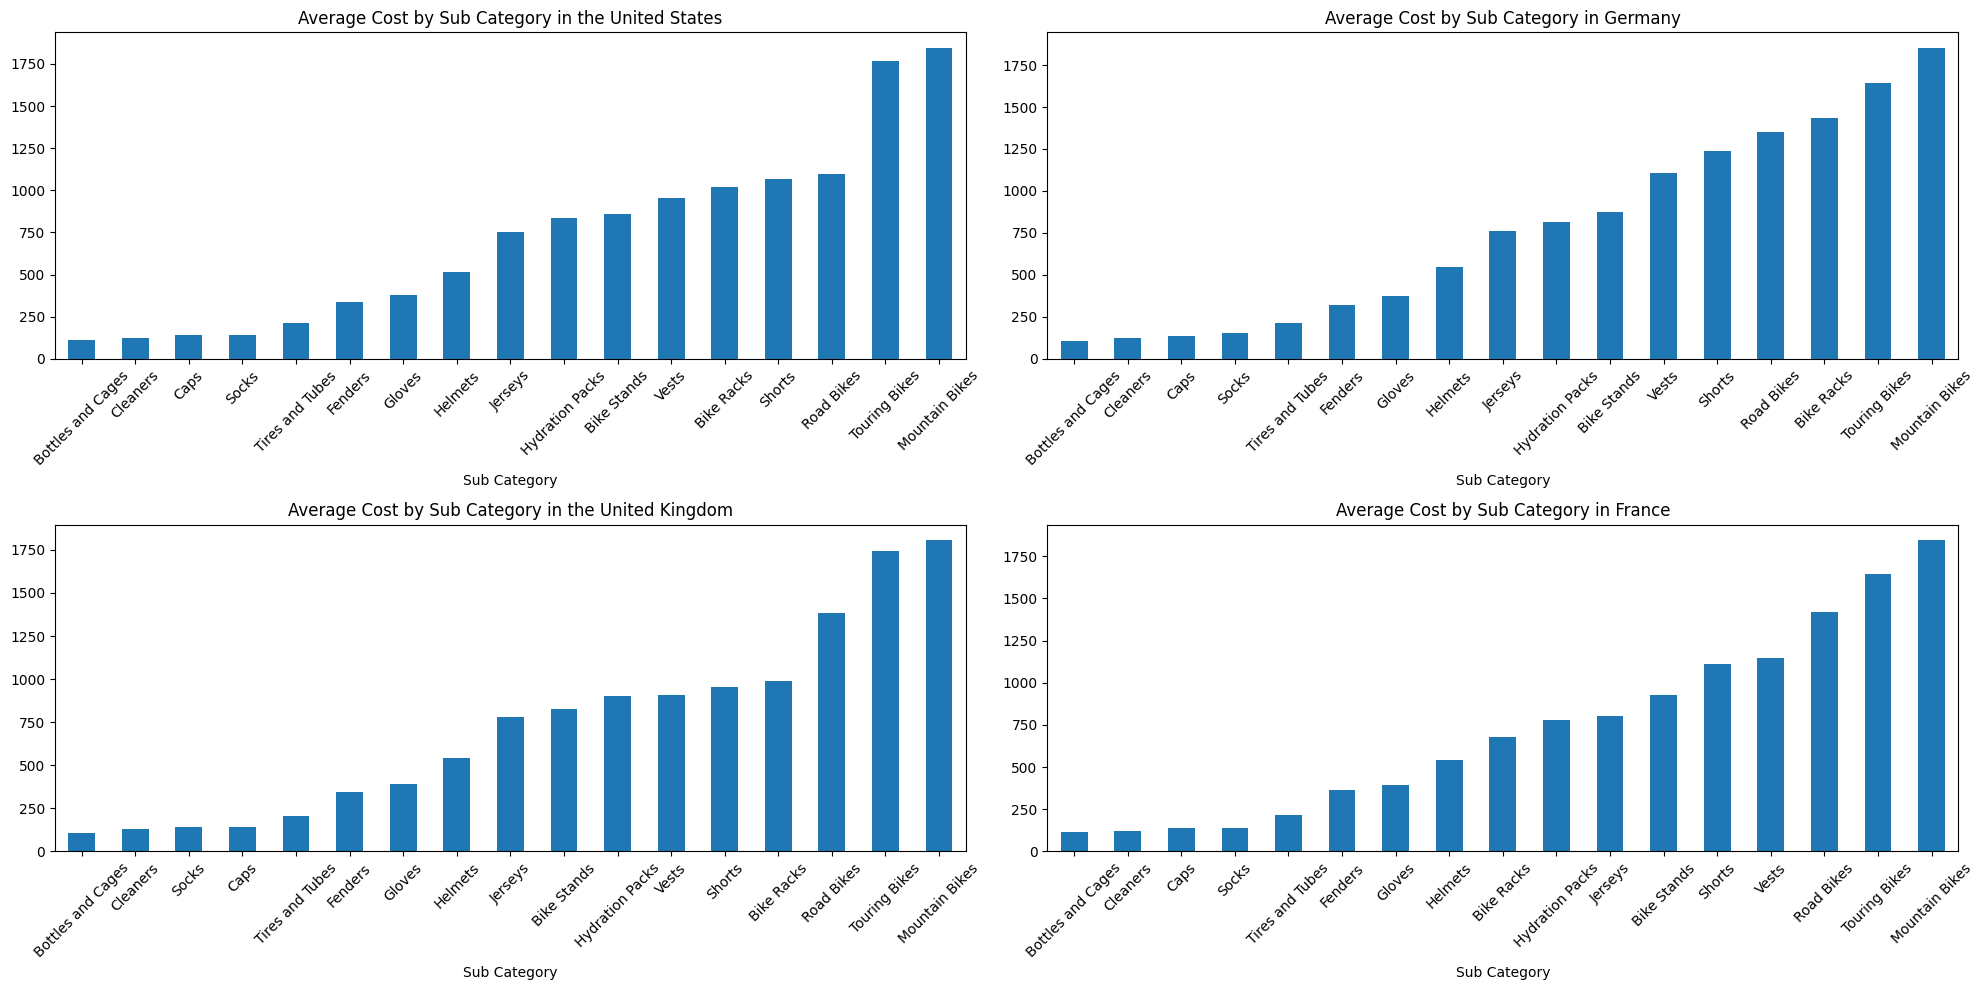

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sales_data[sales_data['Country'] == 'United States'].groupby('Sub Category')['Cost'].mean().sort_values().plot(kind='bar', ax=ax[0, 0])
sales_data[sales_data['Country'] == 'Germany'].groupby('Sub Category')['Cost'].mean().sort_values().plot(kind='bar', ax=ax[0, 1])
sales_data[sales_data['Country'] == 'United Kingdom'].groupby('Sub Category')['Cost'].mean().sort_values().plot(kind='bar', ax=ax[1, 0])
sales_data[sales_data['Country'] == 'France'].groupby('Sub Category')['Cost'].mean().sort_values().plot(kind='bar', ax=ax[1, 1])
ax[0, 0].set_title('Average Cost by Sub Category in the United States')
ax[0, 1].set_title('Average Cost by Sub Category in Germany')
ax[1, 0].set_title('Average Cost by Sub Category in the United Kingdom')
ax[1, 1].set_title('Average Cost by Sub Category in France')

for ax_i in ax.ravel():
    ax_i.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.show()

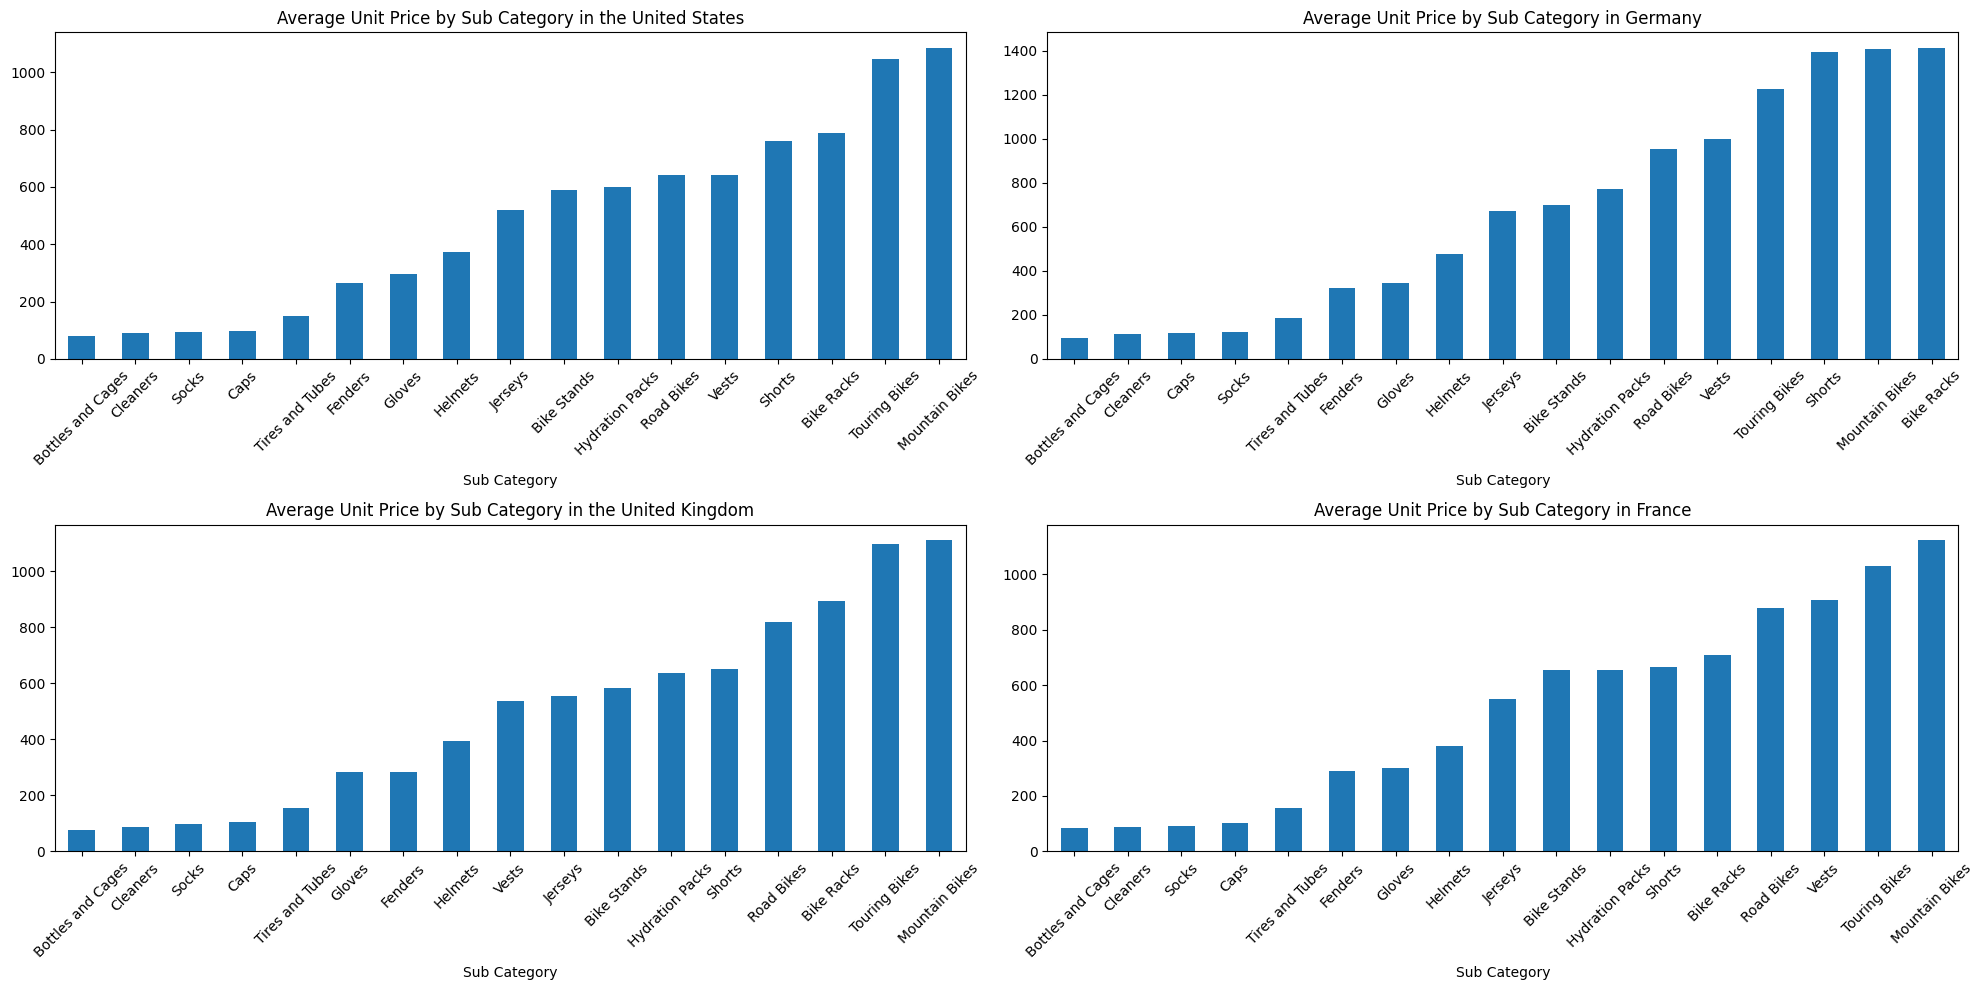

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sales_data[sales_data['Country'] == 'United States'].groupby('Sub Category')['Unit Price'].mean().sort_values().plot(kind='bar', ax=ax[0, 0])
sales_data[sales_data['Country'] == 'Germany'].groupby('Sub Category')['Unit Price'].mean().sort_values().plot(kind='bar', ax=ax[0, 1])
sales_data[sales_data['Country'] == 'United Kingdom'].groupby('Sub Category')['Unit Price'].mean().sort_values().plot(kind='bar', ax=ax[1, 0])
sales_data[sales_data['Country'] == 'France'].groupby('Sub Category')['Unit Price'].mean().sort_values().plot(kind='bar', ax=ax[1, 1])
ax[0, 0].set_title('Average Unit Price by Sub Category in the United States')
ax[0, 1].set_title('Average Unit Price by Sub Category in Germany')
ax[1, 0].set_title('Average Unit Price by Sub Category in the United Kingdom')
ax[1, 1].set_title('Average Unit Price by Sub Category in France')

for ax_i in ax.ravel():
    ax_i.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.show()

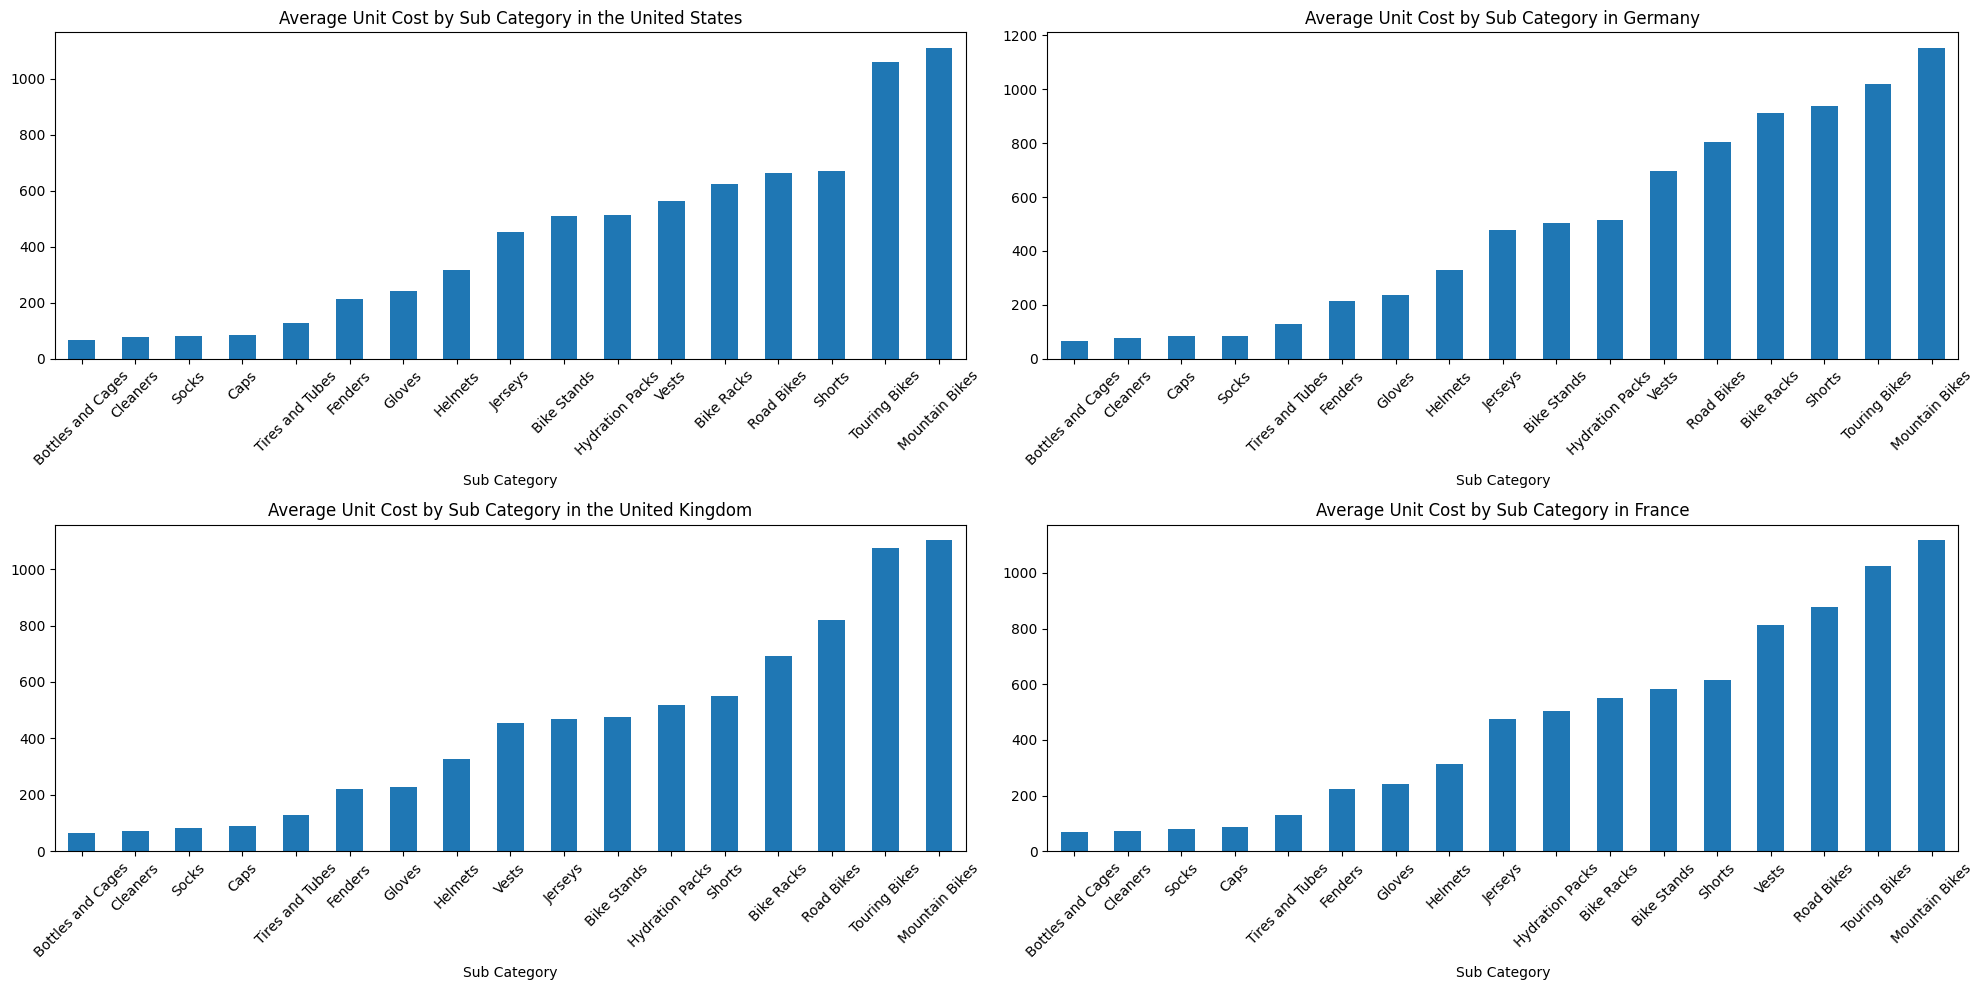

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sales_data[sales_data['Country'] == 'United States'].groupby('Sub Category')['Unit Cost'].mean().sort_values().plot(kind='bar', ax=ax[0, 0])
sales_data[sales_data['Country'] == 'Germany'].groupby('Sub Category')['Unit Cost'].mean().sort_values().plot(kind='bar', ax=ax[0, 1])
sales_data[sales_data['Country'] == 'United Kingdom'].groupby('Sub Category')['Unit Cost'].mean().sort_values().plot(kind='bar', ax=ax[1, 0])
sales_data[sales_data['Country'] == 'France'].groupby('Sub Category')['Unit Cost'].mean().sort_values().plot(kind='bar', ax=ax[1, 1])
ax[0, 0].set_title('Average Unit Cost by Sub Category in the United States')
ax[0, 1].set_title('Average Unit Cost by Sub Category in Germany')
ax[1, 0].set_title('Average Unit Cost by Sub Category in the United Kingdom')
ax[1, 1].set_title('Average Unit Cost by Sub Category in France')

for ax_i in ax.ravel():
    ax_i.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.show()

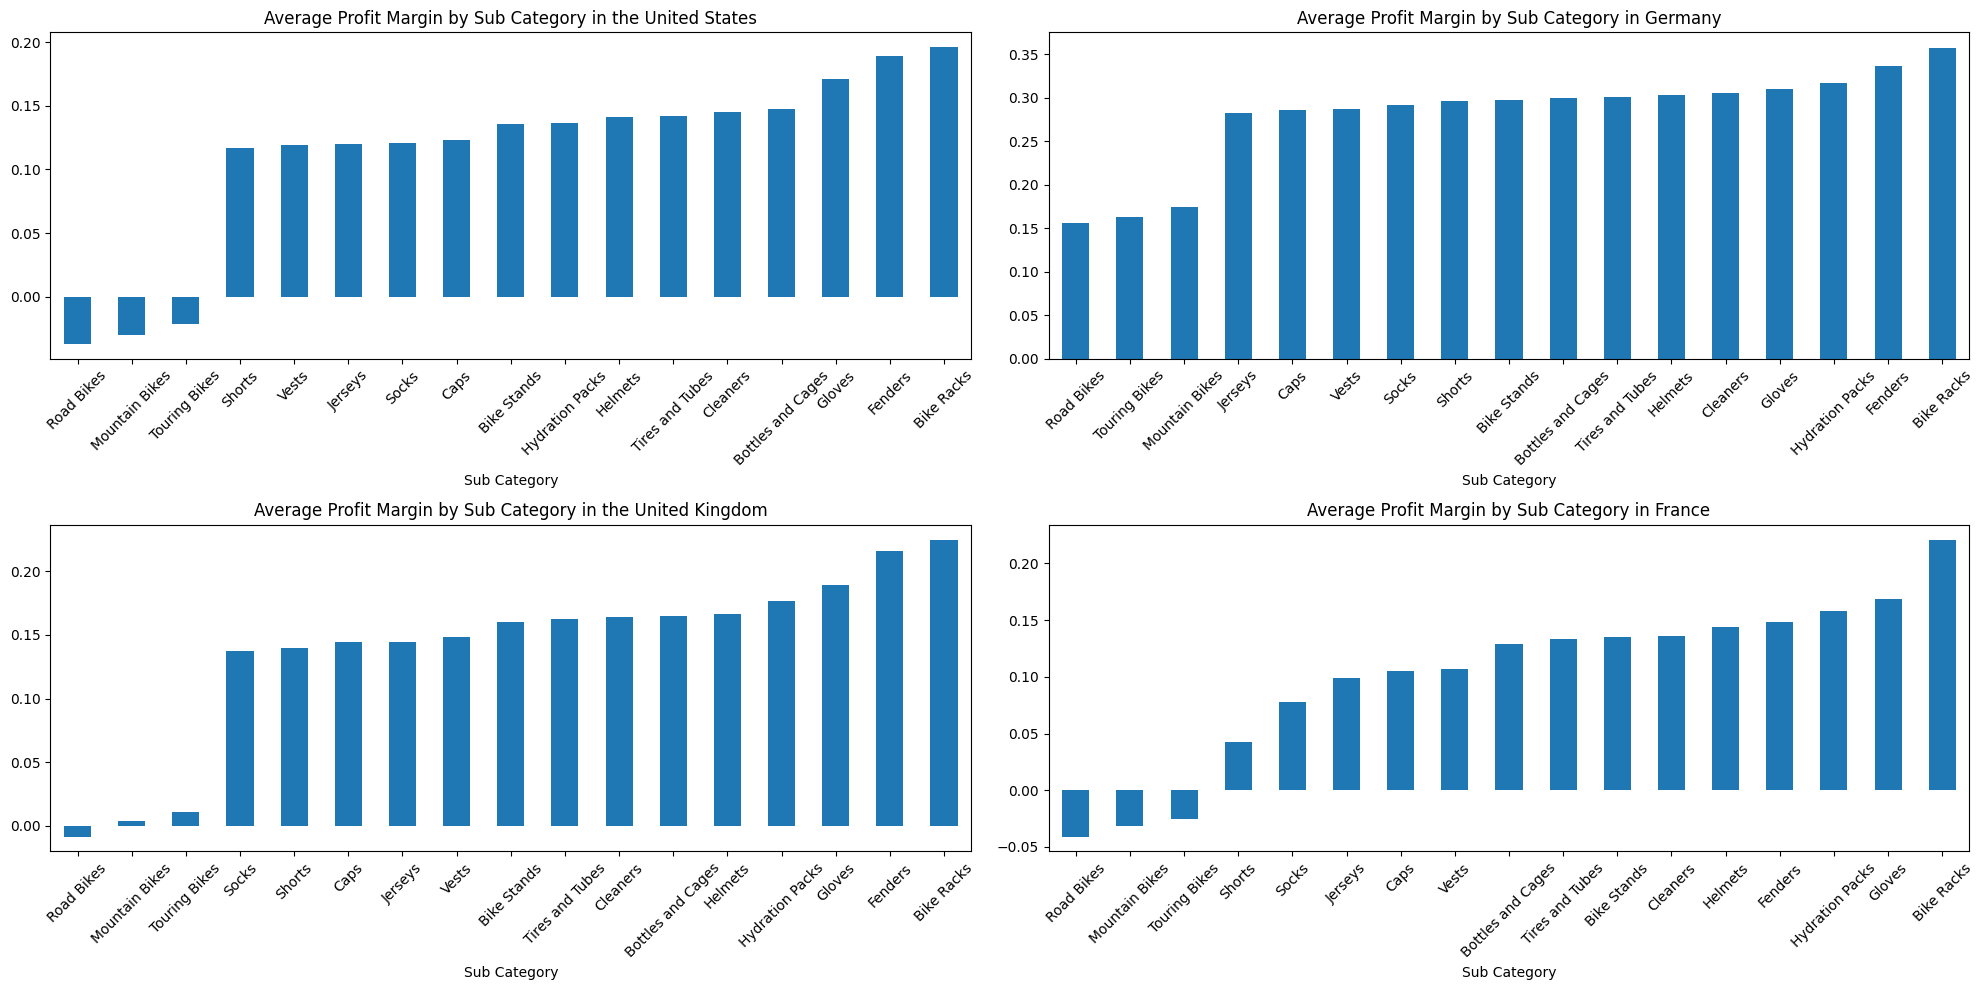

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sales_data[sales_data['Country'] == 'United States'].groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', ax=ax[0, 0])
sales_data[sales_data['Country'] == 'Germany'].groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', ax=ax[0, 1])
sales_data[sales_data['Country'] == 'United Kingdom'].groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', ax=ax[1, 0])
sales_data[sales_data['Country'] == 'France'].groupby('Sub Category')['Profit Margin'].mean().sort_values().plot(kind='bar', ax=ax[1, 1])
ax[0, 0].set_title('Average Profit Margin by Sub Category in the United States')
ax[0, 1].set_title('Average Profit Margin by Sub Category in Germany')
ax[1, 0].set_title('Average Profit Margin by Sub Category in the United Kingdom')
ax[1, 1].set_title('Average Profit Margin by Sub Category in France')

for ax_i in ax.ravel():
    ax_i.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.show()

California, England (UK), Washington, and Oregon were the states with the most revenue.

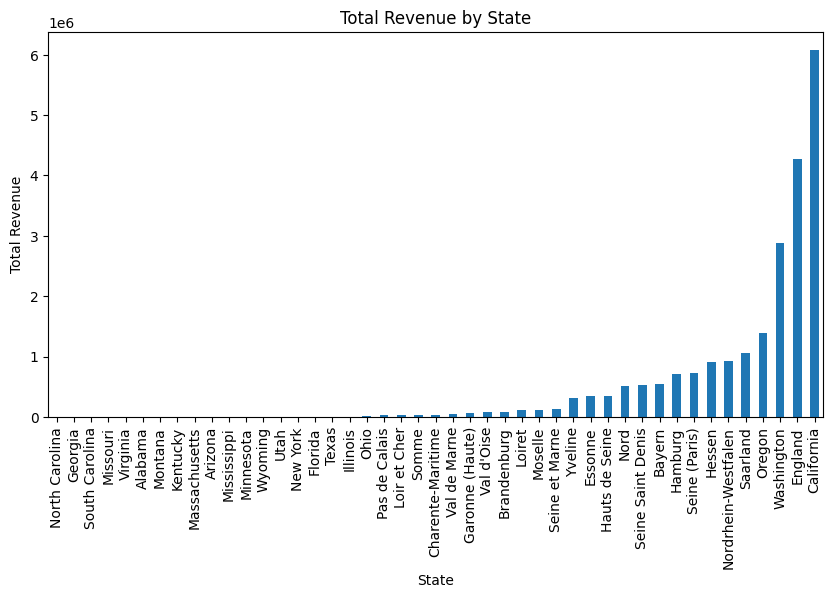

In [49]:
sales_data.groupby('State')['Revenue'].sum().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Total Revenue by State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.show()

Massachusetts and Arizona both had the highest costs of any state desipte have very low revenue. They also had the smallest profit margin out of any state either.

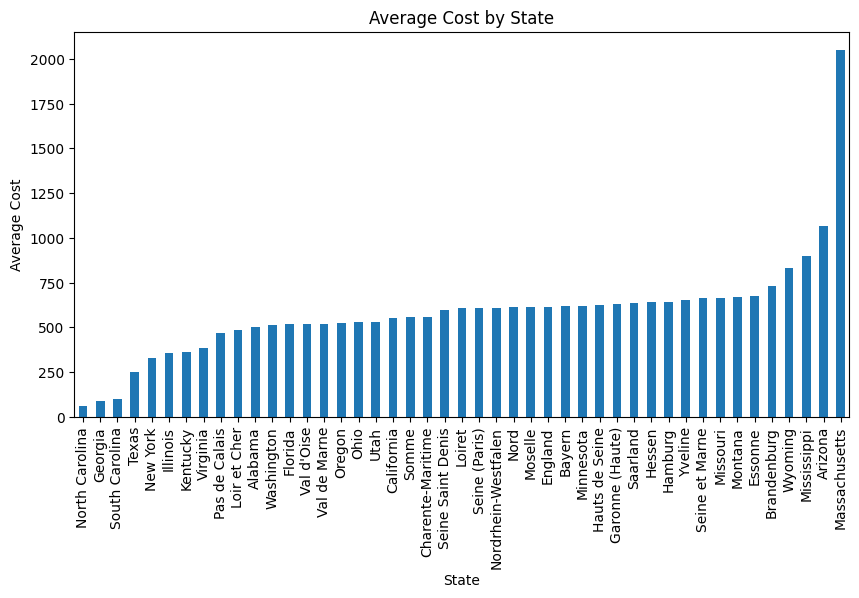

In [50]:
sales_data.groupby('State')['Cost'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by State')
plt.xlabel('State')
plt.ylabel('Average Cost')
plt.show()

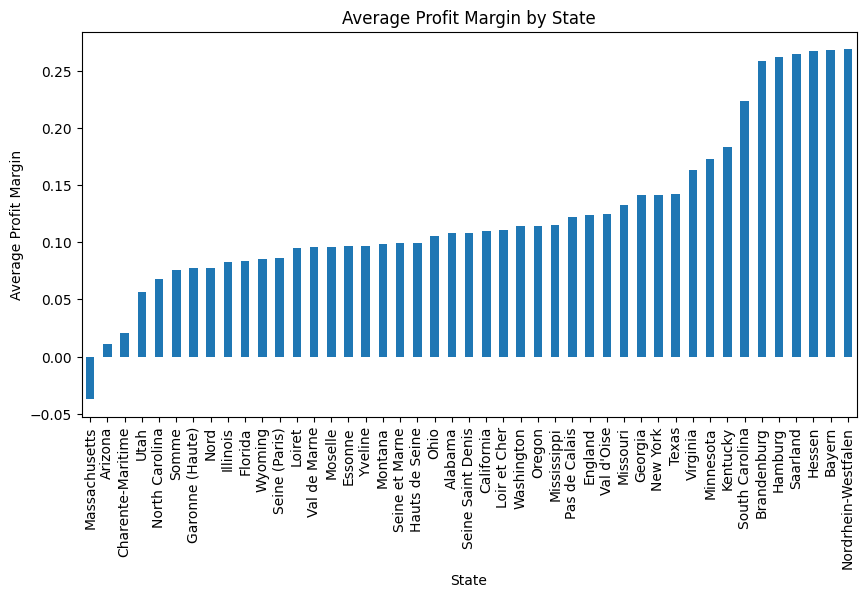

In [51]:
sales_data.groupby('State')['Profit Margin'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by State')
plt.xlabel('State')
plt.ylabel('Average Profit Margin')
plt.show()

### Patterns in revenue by customer demographic

In [52]:
#summary statistics for the customer age
sales_data['Customer Age'].describe()

count    34866.000000
mean        36.382895
std         11.112902
min         17.000000
25%         28.000000
50%         35.000000
75%         44.000000
max         87.000000
Name: Customer Age, dtype: float64

In [53]:
# median age of customers
sales_data['Customer Age'].median()

35.0

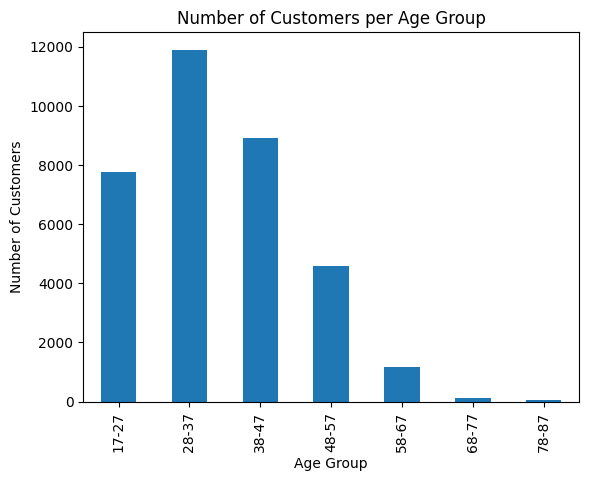

In [54]:
sales_data['Customer Age Group'] = pd.cut(sales_data['Customer Age'], bins=[17, 27, 37, 47, 57, 67, 77, 87], labels=['17-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87'])
sales_data['Customer Age Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Customers per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

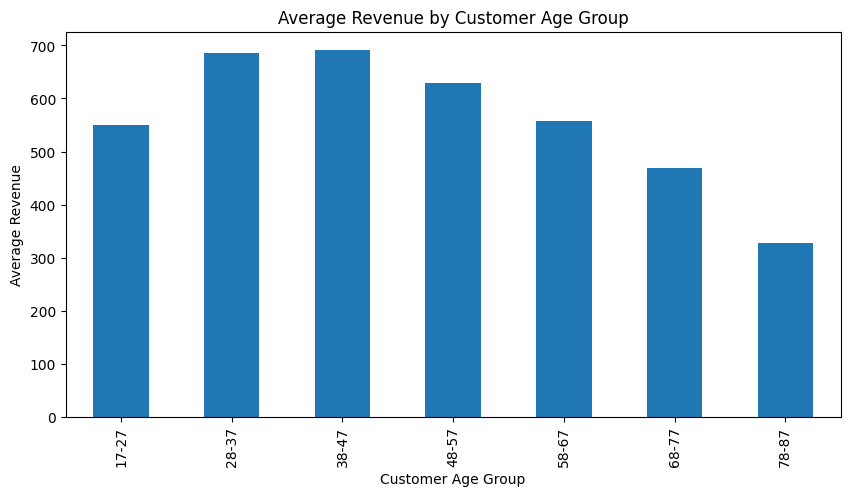

In [55]:
sales_data.groupby('Customer Age Group')['Revenue'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Revenue by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Revenue')
plt.show()

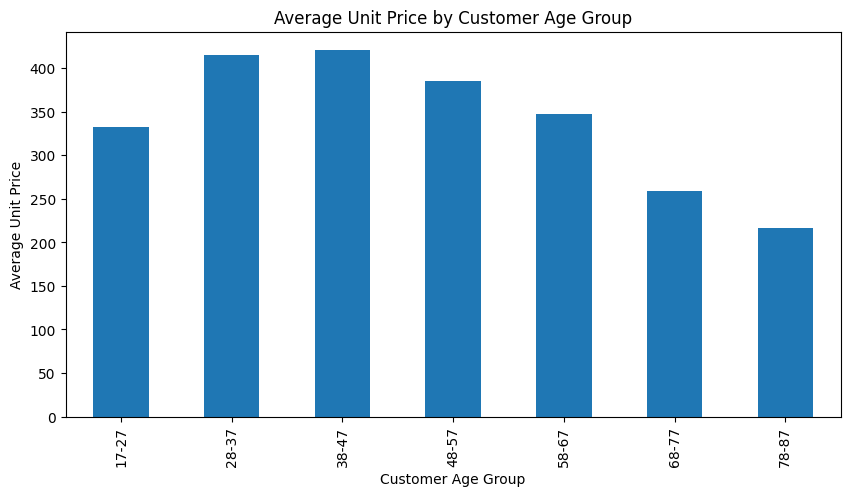

In [56]:
sales_data.groupby('Customer Age Group')['Unit Price'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Unit Price')
plt.show()

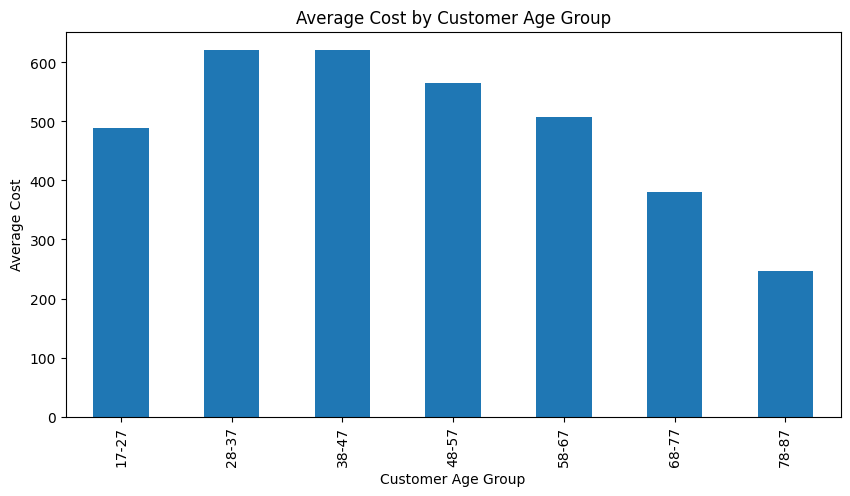

In [57]:
sales_data.groupby('Customer Age Group')['Cost'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Cost by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Cost')
plt.show()

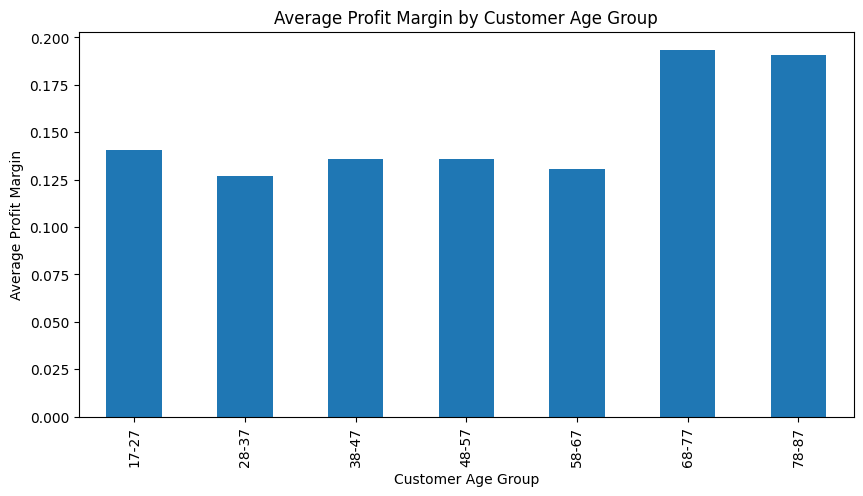

In [58]:
sales_data.groupby('Customer Age Group')['Profit Margin'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Profit Margin by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Average Profit Margin')
plt.show()

In [59]:
sales_data.groupby(['Customer Age Group', 'Sub Category'])['Revenue'].sum().groupby(level=0).nlargest(3)

Customer Age Group  Customer Age Group  Sub Category   
17-27               17-27               Mountain Bikes      873047.0
                                        Road Bikes          718922.0
                                        Tires and Tubes     648923.0
28-37               28-37               Mountain Bikes     1887851.0
                                        Road Bikes         1743495.0
                                        Helmets             952385.0
38-47               38-47               Mountain Bikes     1554510.0
                                        Road Bikes          967783.0
                                        Touring Bikes       790354.0
48-57               48-57               Mountain Bikes      677408.0
                                        Tires and Tubes     422680.0
                                        Road Bikes          419963.0
58-67               58-67               Mountain Bikes      171331.0
                                        Tires a

In [60]:
sales_data.groupby(['Customer Age Group', 'Sub Category'])['Unit Price'].mean().groupby(level=0).nlargest(3)

Customer Age Group  Customer Age Group  Sub Category  
17-27               17-27               Mountain Bikes    1054.805611
                                        Touring Bikes      921.006667
                                        Bike Racks         817.320513
28-37               28-37               Mountain Bikes    1074.157827
                                        Touring Bikes     1038.864412
                                        Bike Racks         853.317708
38-47               38-47               Mountain Bikes    1252.835266
                                        Touring Bikes     1188.612917
                                        Bike Racks         861.561905
48-57               48-57               Touring Bikes     1309.750000
                                        Mountain Bikes    1267.537093
                                        Bike Racks        1202.644444
58-67               58-67               Mountain Bikes    1239.676587
                                   

In [61]:
sales_data.groupby(['Customer Age Group', 'Month'])['Revenue'].sum().groupby(level=0).nlargest(3)

Customer Age Group  Customer Age Group  Month   
17-27               17-27               December     480441.0
                                        May          430141.0
                                        October      411445.0
28-37               28-37               June        1054906.0
                                        May         1037524.0
                                        April        905039.0
38-47               38-47               June         822605.0
                                        February     696079.0
                                        May          689525.0
48-57               48-57               May          391383.0
                                        June         316882.0
                                        December     302675.0
58-67               58-67               November      76039.0
                                        June          73248.0
                                        August        67227.0
68-77               6

In [62]:
sales_data.groupby(['Customer Age Group', 'Season'])['Revenue'].sum().groupby(level=0).nlargest(1)

Customer Age Group  Customer Age Group  Season  
17-27               17-27               2 Spring    1210606.0
28-37               28-37               2 Spring    2705976.0
38-47               38-47               2 Spring    1918416.0
48-57               48-57               2 Spring     883675.0
58-67               58-67               1 Winter     182073.0
68-77               68-77               3 Summer      18792.0
78-87               78-87               2 Spring       9515.0
Name: Revenue, dtype: float64

In [63]:
# customer gender count
sales_data['Customer Gender'].value_counts()

M    17805
F    17061
Name: Customer Gender, dtype: int64

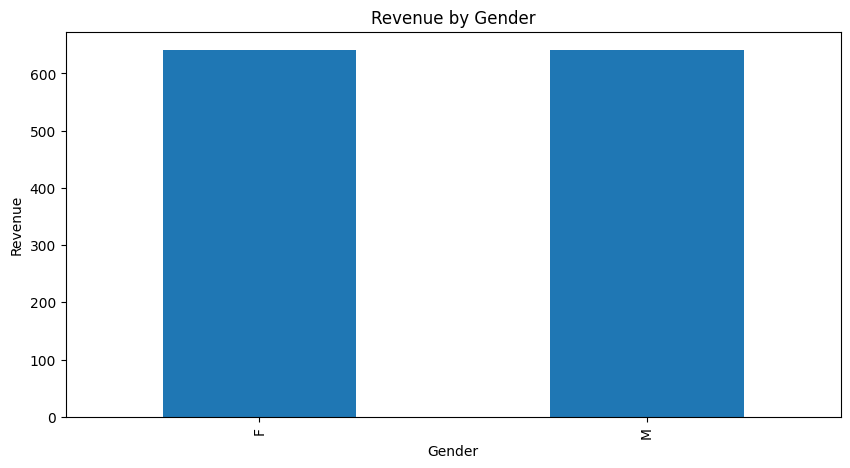

In [64]:
# plot gender (Female) revenue by month
sales_data.groupby('Customer Gender')['Revenue'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.show()

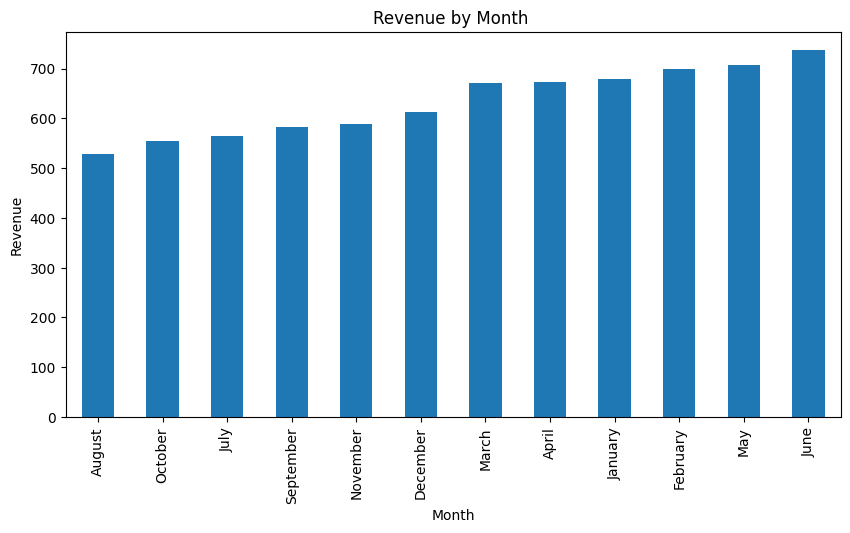

In [65]:
# most popular months to shop for 'F' customers
sales_data[sales_data['Customer Gender'] == 'F'].groupby('Month')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue by Month ')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

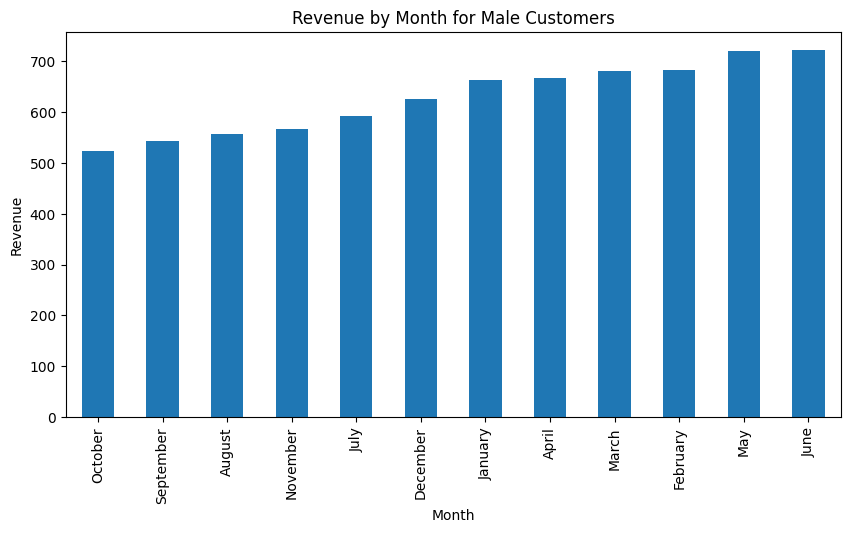

In [66]:
sales_data[sales_data['Customer Gender'] == 'M'].groupby('Month')['Revenue'].mean().sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Revenue by Month for Male Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

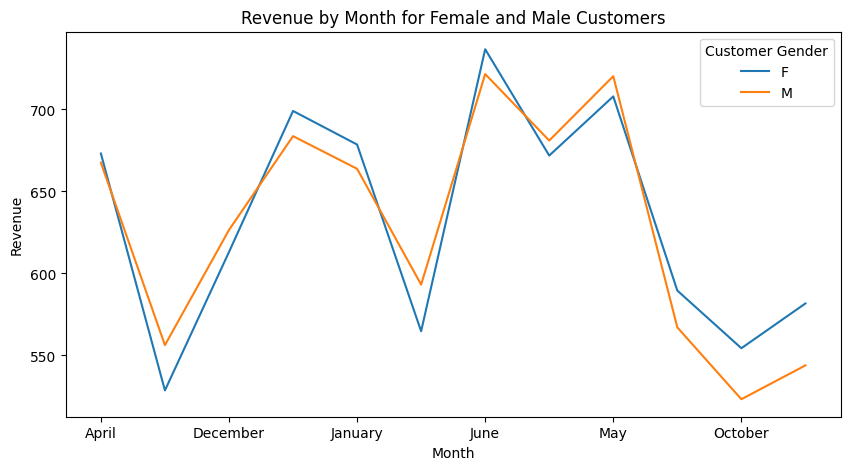

In [67]:
pivot = sales_data.pivot_table(index='Month', columns='Customer Gender', values='Revenue').reset_index()
pivot.plot(x='Month', figsize=(10, 5))
plt.title('Revenue by Month for Female and Male Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

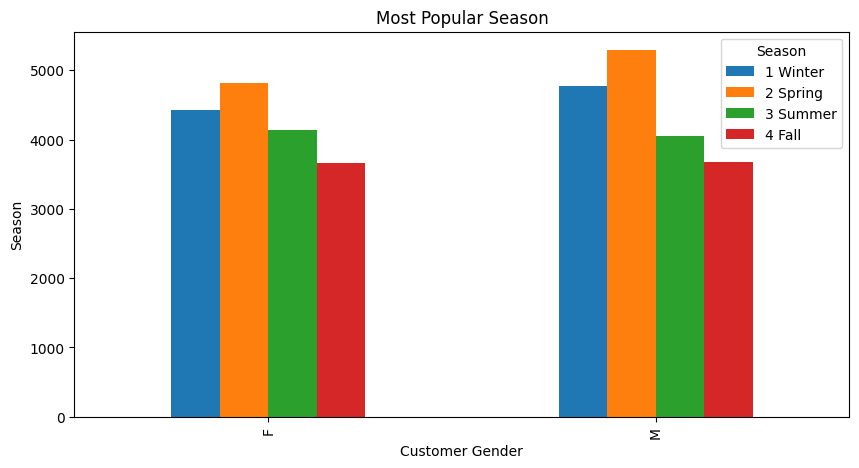

In [68]:
#sub plot to see most popular season to shop for 'F' customers and 'M' customers
sales_data.groupby('Customer Gender')['Season'].value_counts().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Most Popular Season')
plt.xlabel('Customer Gender')
plt.ylabel('Season')
plt.show()

In [69]:
# cost by gender 
sales_data.groupby('Customer Gender')['Cost'].mean()

Customer Gender
F    576.418967
M    575.607414
Name: Cost, dtype: float64

In [70]:
# profit margin by gender
sales_data.groupby('Customer Gender')['Profit Margin'].mean()

Customer Gender
F    0.133828
M    0.134315
Name: Profit Margin, dtype: float64

### Patterns in revenue by unit price

Unit price is a crucial element in pricing optimization as it directly impacts the revenue generated by the company. The analysis began by examining the unit price for each subcategory. The results revealed that the majority of products sold were priced under $300. To further validate this observation, a histogram was created to illustrate the distribution of unit prices.

In [71]:
# unit price for each sub category using a pivot table
sales_data.pivot_table(index='Sub Category', values='Unit Price', aggfunc='mean')

,Unit Price
Sub Category,
Bike Racks,885.839806
Bike Stands,612.243678
Bottles and Cages,81.944319
Caps,104.151395
Cleaners,92.452294
Fenders,276.916885
Gloves,299.732986
Helmets,395.600655
Hydration Packs,630.190236


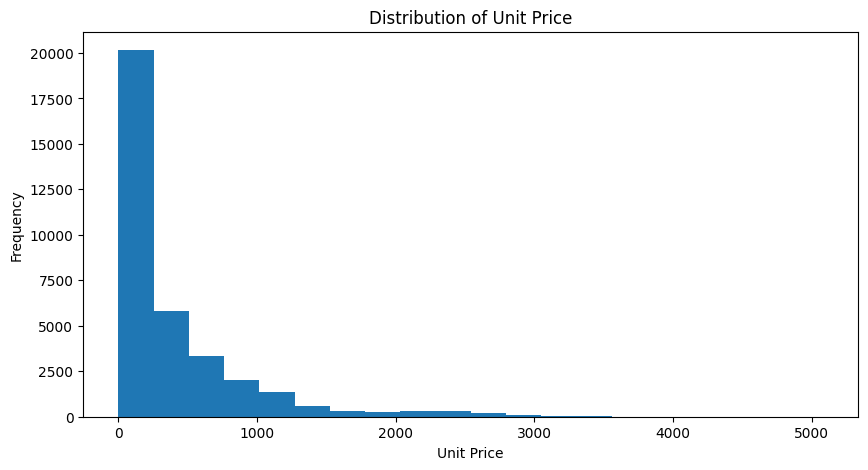

In [72]:
sales_data['Unit Price'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

To gain a deeper understanding of the pricing strategy for each category, a bar graph was created to illustrate the average unit price for each category. The visualization indicates that on average, bikes were the most expensive category, which may explain the high revenue generated from this category. In contrast, the average unit price for accessories was more varied, indicating that pricing for this category may be less consistent.

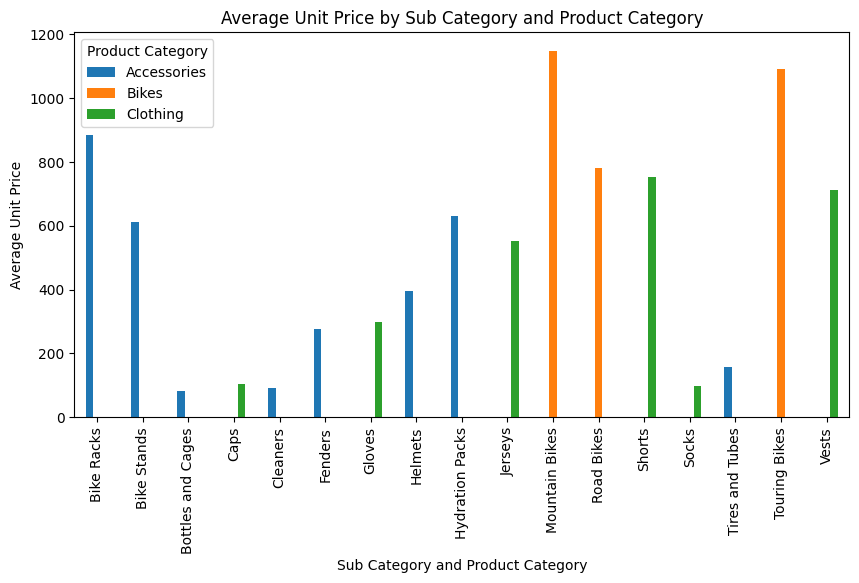

In [73]:
sales_data.groupby(['Sub Category', 'Product Category'])['Unit Price'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Price by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Unit Price')
plt.show()

The scatterplot below illustrates the relationship between unit price and revenue for each product. The visualization reveals a strong correlation between the two variables. However, at this point, further analysis would be necessary to determine if increasing prices would result in higher revenue.

C:\Users\annco\AppData\Local\Temp\ipykernel_16736\3627017301.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Unit Price', 'Revenue'].mean().plot(kind='scatter', x='Unit Price', y='Revenue', figsize=(10, 5))


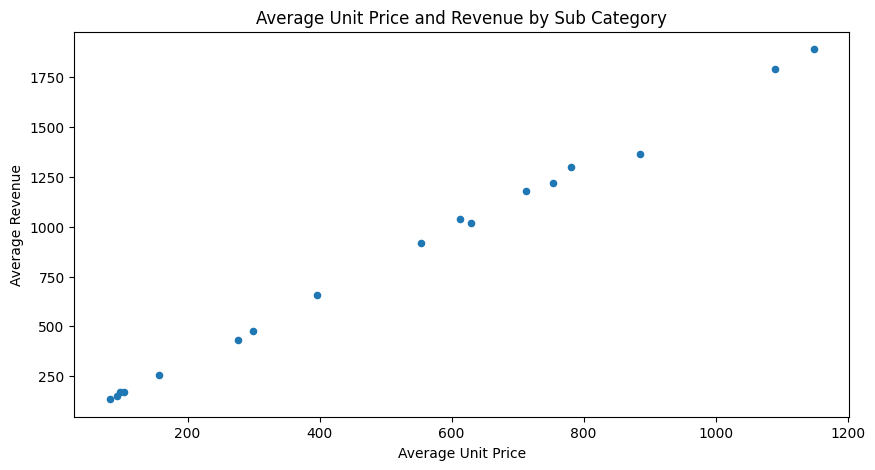

In [74]:
sales_data.groupby('Sub Category')['Unit Price', 'Revenue'].mean().plot(kind='scatter', x='Unit Price', y='Revenue', figsize=(10, 5))
plt.title('Average Unit Price and Revenue by Sub Category')
plt.xlabel('Average Unit Price')
plt.ylabel('Average Revenue')
plt.show()

However, it appears that there is no correlation between unit price and quantity sold for each product, as shown in the scatterplot . This suggests that increasing or decreasing the unit price may not affect the quantity of products sold, hence it's not a determinant factor on the quantity sold.

C:\Users\annco\AppData\Local\Temp\ipykernel_16736\1885519914.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Unit Price', 'Quantity'].mean().plot(kind='scatter', x='Unit Price', y='Quantity', figsize=(10, 5))


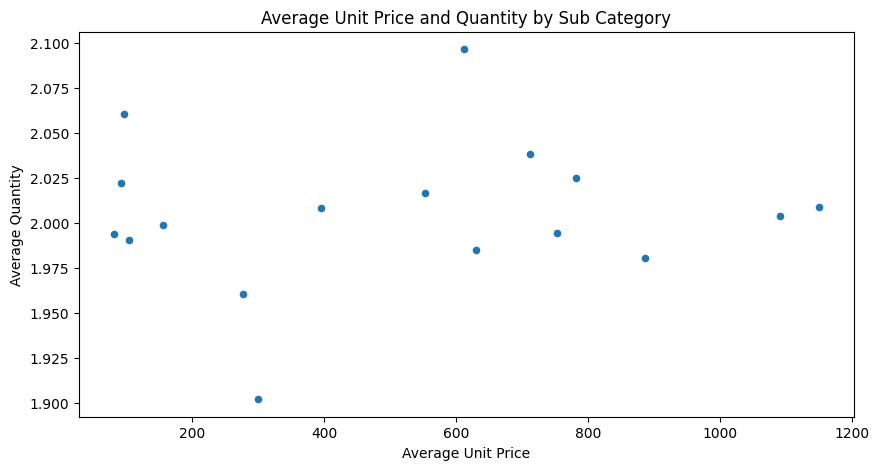

In [75]:
sales_data.groupby('Sub Category')['Unit Price', 'Quantity'].mean().plot(kind='scatter', x='Unit Price', y='Quantity', figsize=(10, 5))
plt.title('Average Unit Price and Quantity by Sub Category')
plt.xlabel('Average Unit Price')
plt.ylabel('Average Quantity')
plt.show()

### Patterns in revenue by unit cost

Next, the analysis focused on identifying patterns in revenue by unit cost. The objective was to determine the extent to which unit cost influenced unit price and the impact it had on revenue for each product. To accomplish this, I first created a histogram to visualize the distribution of unit costs. 

At first look, the distribution of unit cost is right-skewed. While the majority of the data points have a lower unit cost values, there are a few outliers with much higher unit cost values, such as the Mountain and Touring bikes.

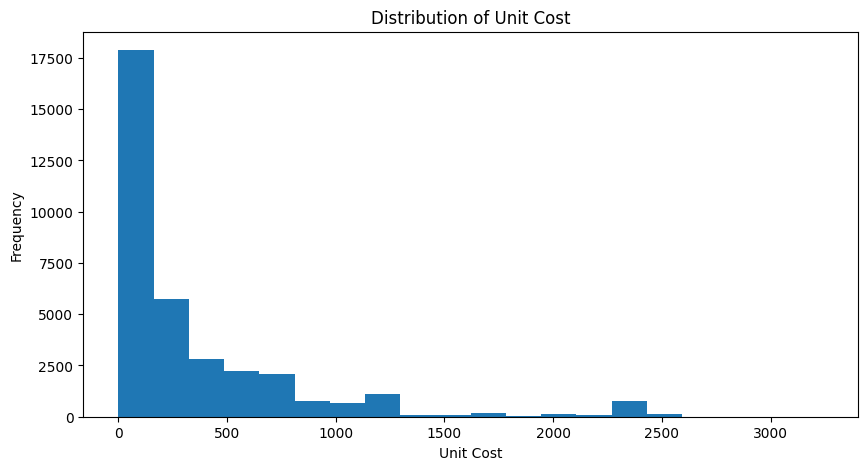

In [76]:
sales_data['Unit Cost'].plot(kind='hist', bins=20, figsize=(10, 5))
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost')
plt.ylabel('Frequency')
plt.show()

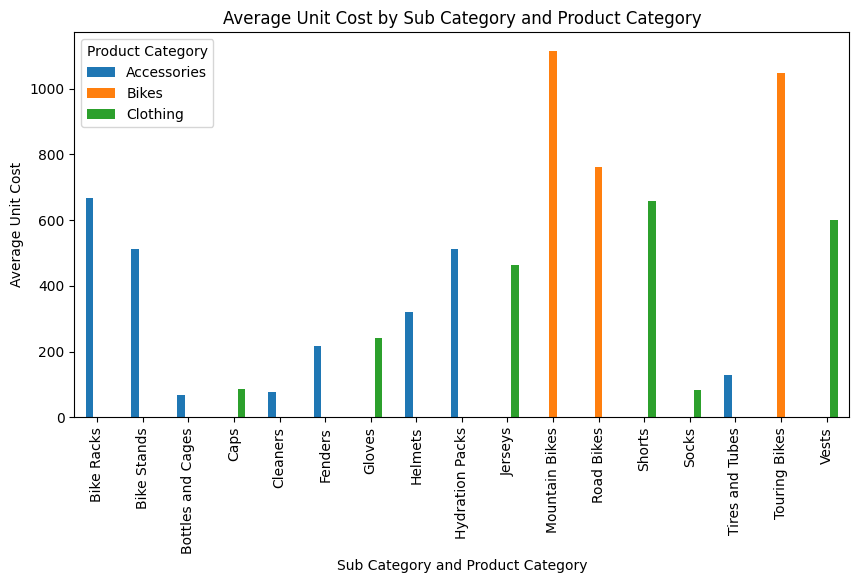

In [77]:
sales_data.groupby(['Sub Category', 'Product Category'])['Unit Cost'].mean().unstack().plot(kind='bar', figsize=(10, 5))
plt.title('Average Unit Cost by Sub Category and Product Category')
plt.xlabel('Sub Category and Product Category')
plt.ylabel('Average Unit Cost')
plt.show()

An analysis of the data revealed a positive correlation between unit cost and revenue. This suggests that as the unit cost increases, revenue also increases for that subcategory. This correlation may indicate that products within this subcategory which have higher production costs also generate higher revenues. It is possible that this correlation is due to a variety of reasons such as high demand for the products in this subcategory, a higher perceived value or unique specialized features that justify the higher price point.

C:\Users\annco\AppData\Local\Temp\ipykernel_16736\3808355085.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_data.groupby('Sub Category')['Unit Cost', 'Revenue'].mean().plot(kind='scatter', x='Unit Cost', y='Revenue', figsize=(10, 5))


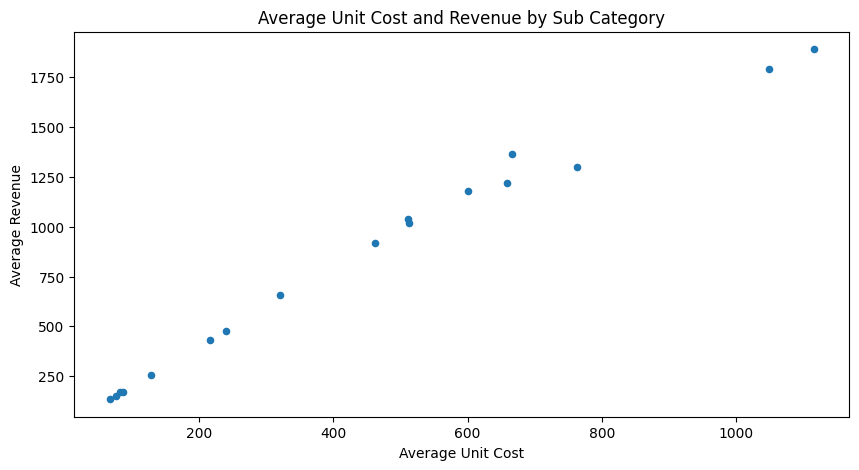

In [78]:
sales_data.groupby('Sub Category')['Unit Cost', 'Revenue'].mean().plot(kind='scatter', x='Unit Cost', y='Revenue', figsize=(10, 5))
plt.title('Average Unit Cost and Revenue by Sub Category')
plt.xlabel('Average Unit Cost')
plt.ylabel('Average Revenue')
plt.show()